# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from ner import AppConfig, NERModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
env = {'app_root': app_root_dir,
       'gpu_primary_index': 1}
config = AppConfig(config_file=app_root_dir + '/resources/conf', env=env)

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = NERModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: NER
  feature splits:
    split stash splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
        total: 20744


2020-12-07 13:23:06,329[INFO]zensols.multi.stash: sent_batch_stash: spawning work with chunk size 55 across 3 workers


    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
        test: 27 (16.6%)
        train: 110 (67.5%)
        dev: 26 (16.0%)
        total: 163


2020-12-07 13:23:06,387[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 0 in 0s
2020-12-07 13:23:06,389[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 13:23:06,391[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 1 in 0s
2020-12-07 13:23:06,392[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 13:23:06,392[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 2 in 0s
2020-12-07 13:23:06,394[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-12-07 13:23:06,642[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2020-12-07 13:23:06,653[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2020-12-07 13:23:06,655[INFO]zensols.deepnlp.embed.wordtext: reading bina

    total this instance: 163
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 128
      data_point_id_sets_path: ../data/batch/b128/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'ents', 'mask', 'tags', 'syns', 'glove_50_embedding'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: recurrent_crf_settings
      dropout: 0.1
      network_type: lstm
      bidirectional: True
      hidden_size: 24
      num_layers: 1
      num_labels: 9
      decoder_settings:
        name: linear_settings
        middle_features:
        proportions: True
        repeats: 1
      score_reduction: sum
    mask_attribute: mask
  model settings:
    name: model_settings
    path: ../target/model/glove_50_embedding
    learning_rate: 0.001
    epochs: 2
    max_consecutive_increased_c

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2020-12-07 13:25:49,284[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 13:25:49,285[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 13:25:49,287[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-07 13:26:00,519[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 11s
2020-12-07 13:26:00,520[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-07 13:26:00,523[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-07 13:26:00,575[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork'> on cuda:1 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2020-12-07 13:26:00,577[INFO]zensols.deeplearn.mod

Name: NER: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/07/2020 13:26:00:578416
    ended: 12/07/2020 13:26:22:828247
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 2/2
    ave/min loss: 142094.56767/49487.18522
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 2/2
    ave/min loss: 132804.42203/22366.33216
    accuracy: 0.838 (42904/51217)
    micro: F1: 0.838, precision: 0.838, recall: 0.838
    macro: F1: 0.134, precision: 0.484, recall: 0.129
  test:
    started: 12/07/2020 13:26:24:702528
    ended: 12/07/2020 13:26:25:832138
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.830 (38477/46361)
    micro: F1: 0.830, precision: 0.830, recall: 0.830
    macro: F1: 0.134, precision: 0.473, recall: 0.12

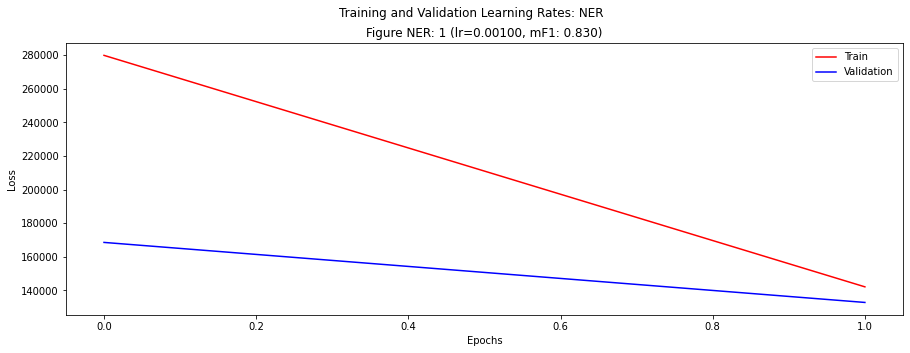

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2020-12-07 13:26:26,754[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 13:26:26,756[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 13:26:26,757[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-07 13:26:26,758[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-07 13:26:26,787[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-07 13:26:26,816[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork'> on cuda:1 for 20 epochs using learning rate 0.01
  0%|                                                                                            | 0/20 [00:00<?, ?it/s]2020-12-07 13:26:26,818[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:13229.190|va min:23099.766|va:

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/07/2020 13:26:26:819035
    ended: 12/07/2020 13:30:15:702393
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 20/20
    ave/min loss: 13229.18997/5225.98969
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/20
    ave/min loss: 23099.76559/2330.00423
    accuracy: 0.965 (49402/51217)
    micro: F1: 0.965, precision: 0.965, recall: 0.965
    macro: F1: 0.817, precision: 0.850, recall: 0.791
  test:
    started: 12/07/2020 13:30:15:914221
    ended: 12/07/2020 13:30:17:058970
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44189/46361)
    micro: F1: 0.953, precision: 0.953, recall: 0.953
    macro: F1: 0.784, precision: 0.788, recall: 0.782

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork (2)

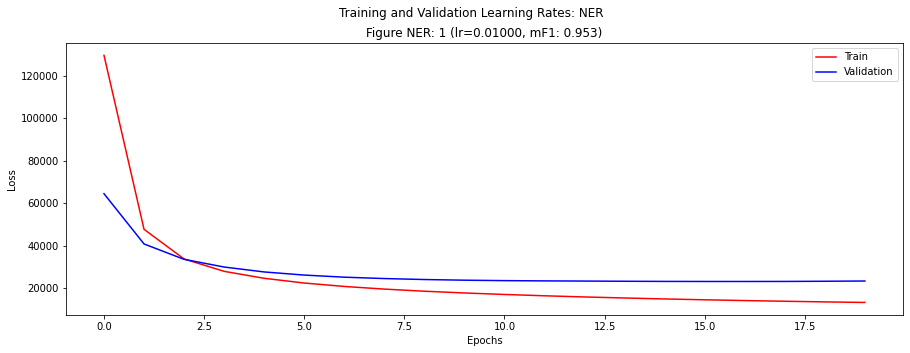

In [5]:
facade.learning_rate = 0.01
facade.epochs = 20
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-07 13:30:17,402[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 13:30:17,403[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 13:30:17,404[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-07 13:30:17,405[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-07 13:30:17,433[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-07 13:30:17,462[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork'> on cuda:1 for 25 epochs using learning rate 0.01
  0%|                                                                                            | 0/25 [00:00<?, ?it/s]2020-12-07 13:30:17,464[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:11536.075|va min:24081.628|va:

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/07/2020 13:30:17:464751
    ended: 12/07/2020 13:34:55:759519
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 11536.07530/4059.34687
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 13/25
    ave/min loss: 24081.62782/2807.66197
    accuracy: 0.963 (49317/51217)
    micro: F1: 0.963, precision: 0.963, recall: 0.963
    macro: F1: 0.815, precision: 0.843, recall: 0.791
  test:
    started: 12/07/2020 13:34:55:968329
    ended: 12/07/2020 13:34:57:106449
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.955 (44274/46361)
    micro: F1: 0.955, precision: 0.955, recall: 0.955
    macro: F1: 0.792, precision: 0.792, recall: 0.793

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork (2)

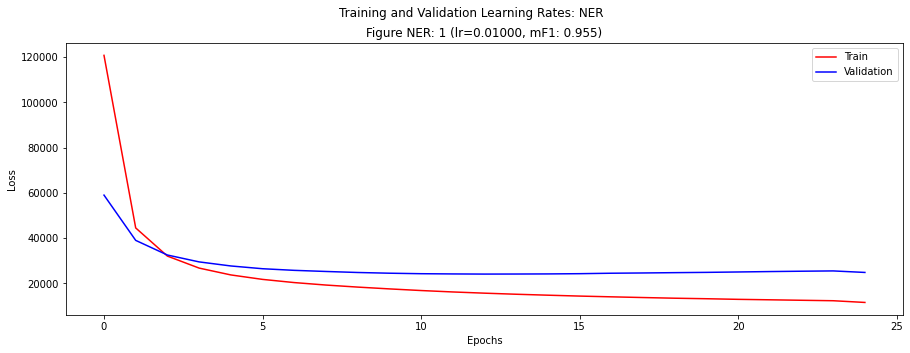

In [6]:
facade.learning_rate = 0.01
facade.epochs = 25
facade.embedding = 'glove_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-07 13:34:57,438[INFO]zensols.deeplearn.model.facade: clearing
2020-12-07 13:34:57,458[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-07 13:34:57,464[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, device: cpu
2020-12-07 13:34:57,475[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 13:34:57,476[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 13:34:57,500[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2020-12-07 13:35:04,912[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2020-12-07 13:35:04,913[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-07 13:35:04,917[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-07 13:35:04,946[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnl

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/07/2020 13:35:04:949039
    ended: 12/07/2020 13:39:53:147383
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 12220.46423/4870.88238
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 15/25
    ave/min loss: 23481.61438/2810.99563
    accuracy: 0.964 (49358/51217)
    micro: F1: 0.964, precision: 0.964, recall: 0.964
    macro: F1: 0.818, precision: 0.843, recall: 0.798
  test:
    started: 12/07/2020 13:39:54:835686
    ended: 12/07/2020 13:39:56:319464
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.950 (44038/46361)
    micro: F1: 0.950, precision: 0.950, recall: 0.950
    macro: F1: 0.780, precision: 0.776, recall: 0.785

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork (2)

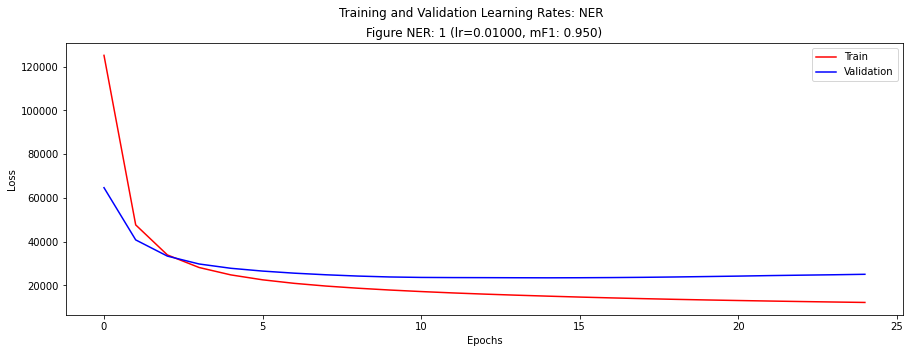

In [7]:
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-07 13:39:56,655[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-07 13:39:56,656[INFO]zensols.deeplearn.model.facade: training...
2020-12-07 13:39:56,658[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2020-12-07 13:40:04,093[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2020-12-07 13:40:04,093[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2020-12-07 13:40:04,168[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:1
2020-12-07 13:40:04,207[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork'> on cuda:1 for 80 epochs using learning rate 0.01
  0%|                                                   | 0/80 [00:00<?, ?it/s]2020-12-07 13:40:04,209[INFO]zensols.deeplearn.model.executor.status: watching update file 

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 12/07/2020 13:40:04:210104
    ended: 12/07/2020 13:55:01:692890
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 80/80
    ave/min loss: 9516.81291/3916.16731
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/80
    ave/min loss: 22164.07053/3077.35231
    accuracy: 0.966 (49473/51217)
    micro: F1: 0.966, precision: 0.966, recall: 0.966
    macro: F1: 0.830, precision: 0.863, recall: 0.802
  test:
    started: 12/07/2020 13:55:03:638414
    ended: 12/07/2020 13:55:05:062079
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44201/46361)
    micro: F1: 0.953, precision: 0.953, recall: 0.953
    macro: F1: 0.786, precision: 0.796, recall: 0.777


zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRFNetwork (2)

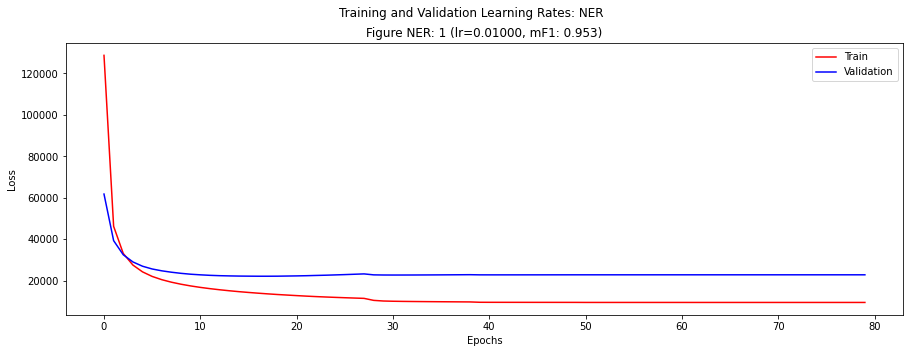

In [8]:
facade.epochs = 80
facade.embedding = 'bert_embedding'
facade.net_settings.add_attributes = ()
facade.train()
facade.test()
facade.write_result()
facade.plot_result()